# Proyecto 4 - Visión por Computadora
## Integrantes:

- Javier Alvarado - 21188
- Mario Guerra - 21008
- Emilio Solano - 21212

In [1]:
# Instalación de dependencias
!pip install tensorflow scikit-learn matplotlib seaborn opencv-python

  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached opencv_python-4.11.0.86-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached absl_py-2.2.2-py3-none-any.whl.metadata (2.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.2.10-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached numpy-2.1.3-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached ml_dtypes-0.5.1-cp312-cp312-win_amd64.whl.metadata (22 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp312-cp312-win_amd64.whl.metadata (6.3 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached pandas-2.

# Reconocimiento de dígitos escritos a mano usando una CNN

Epoch 1/20


c:\Users\mague\Downloads\handwrittenDigitsRecognitionCV\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 130s 68ms/step - accuracy: 0.8950 - loss: 0.3477 - val_accuracy: 0.9861 - val_loss: 0.0381
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 160s 85ms/step - accuracy: 0.9774 - loss: 0.0753 - val_accuracy: 0.9911 - val_loss: 0.0294
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 113s 60ms/step - accuracy: 0.9839 - loss: 0.0566 - val_accuracy: 0.9910 - val_loss: 0.0257
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9854 - loss: 0.0479 - val_accuracy: 0.9927 - val_loss: 0.0216
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9870 - loss: 0.0402 - val_accuracy: 0.9926 - val_loss: 0.0221
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.9887 - loss: 0.0340 - val_accuracy: 0.9937 - val_loss: 0.0217
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9901 - loss: 0.0319 - val_accuracy: 0.9938 - val_loss: 0.0194
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9911 - loss: 0

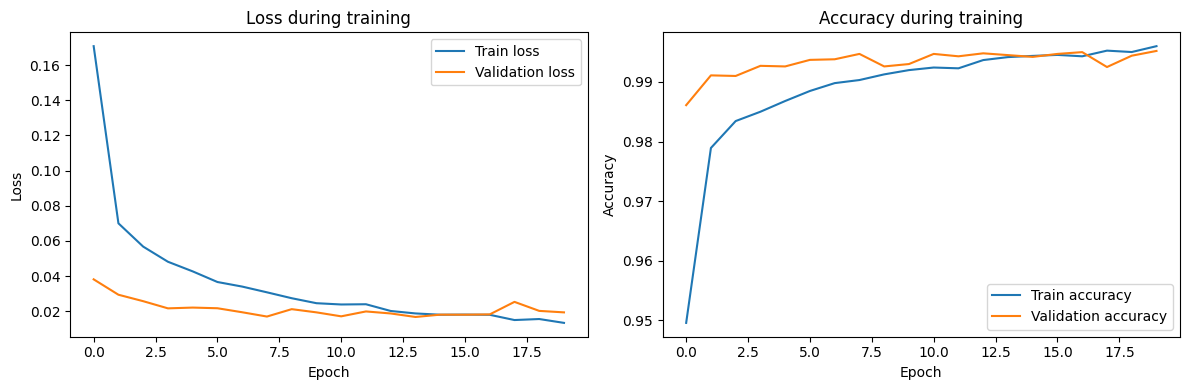

In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Cargar y preparar los datos MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
x_train = np.expand_dims(x_train, -1)  # (28,28,1)
x_test = np.expand_dims(x_test, -1)

# Construcción de la CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compilación
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenamiento
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

# Guardar el modelo
model.save("cnn_model.h5")

# Realizar gráficas de pérdida y validación
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Loss during training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Graficar precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Accuracy during training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


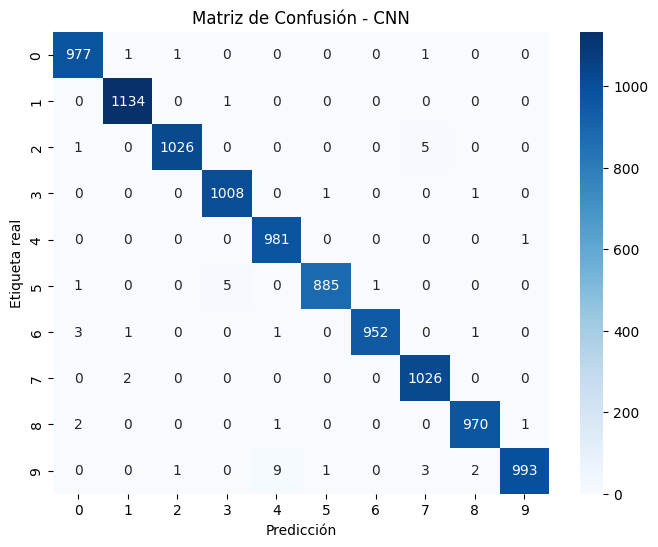

Clasification Report: 
              precision    recall  f1-score   support

           0     0.9929    0.9969    0.9949       980
           1     0.9965    0.9991    0.9978      1135
           2     0.9981    0.9942    0.9961      1032
           3     0.9941    0.9980    0.9960      1010
           4     0.9889    0.9990    0.9939       982
           5     0.9977    0.9922    0.9949       892
           6     0.9990    0.9937    0.9963       958
           7     0.9913    0.9981    0.9947      1028
           8     0.9959    0.9959    0.9959       974
           9     0.9980    0.9841    0.9910      1009

    accuracy                         0.9952     10000
   macro avg     0.9952    0.9951    0.9952     10000
weighted avg     0.9952    0.9952    0.9952     10000



In [6]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Cargar modelo guardado
model = tf.keras.models.load_model("cnn_model.h5")

# Preparar datos de prueba
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_test = x_test.astype("float32") / 255.0
x_test = np.expand_dims(x_test, -1)

# Obtener predicciones
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - CNN")
plt.xlabel("Predicción")
plt.ylabel("Etiqueta real")
plt.show()

# Reporte de métricas
print("Clasification Report: ")
print(classification_report(y_test, y_pred, digits=4))

In [41]:
import os
import random
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

def predict_images(model_path="cnn_model.h5", folder="input/", num_images=20):
    model = tf.keras.models.load_model(model_path)

    # Filtrar archivos de imagen
    images = [f for f in os.listdir(folder) if f.lower().endswith((".png", ".jpg", ".jpeg"))]
    selected_images = random.sample(images, min(num_images, len(images)))

    for file in selected_images:
        if file.lower().endswith((".png", ".jpg", ".jpeg")):
            ruta = os.path.join(folder, file)
            img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)

            if img is None:
                print(f"No se pudo cargar {file}")
                continue

            # Invertir si el fondo es blanco
            if np.mean(img) > 127:
                img = cv2.bitwise_not(img)

            # Redimensionar a 28x28
            img = cv2.resize(img, (28, 28))

            # Normalizar y expandir dimensiones
            img = img.astype("float32") / 255.0
            img = np.expand_dims(img, axis=-1)
            img = np.expand_dims(img, axis=0)

            pred = model.predict(img)
            clase = np.argmax(pred)

            # Mostrar resultado
            plt.imshow(img[0].reshape(28, 28), cmap="gray")
            plt.title(f"{file} → Predicción: {clase}")
            plt.axis('off')
            plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step


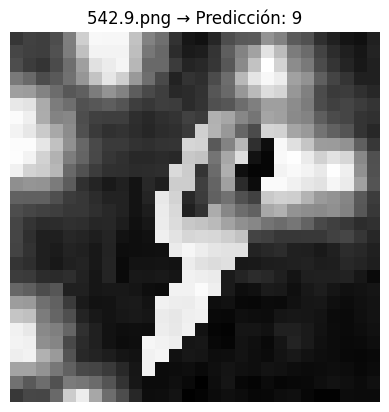

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


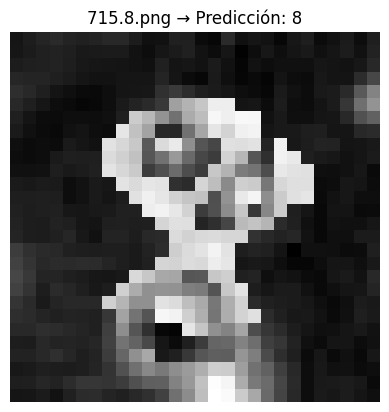

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


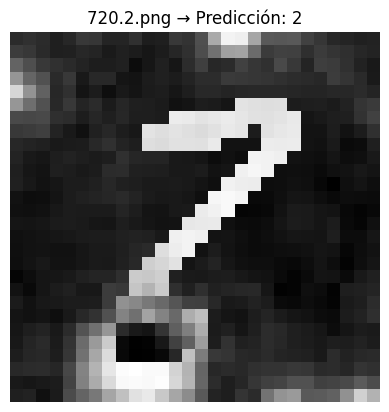

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


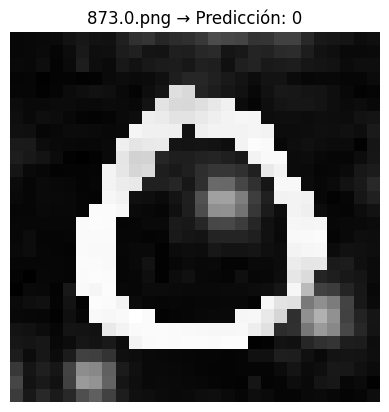

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


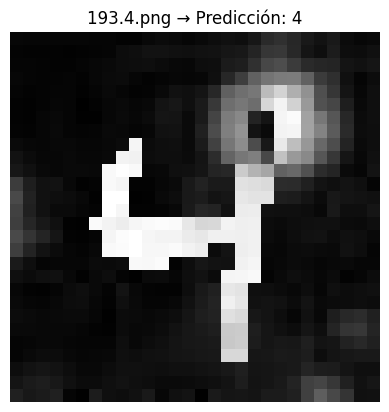

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


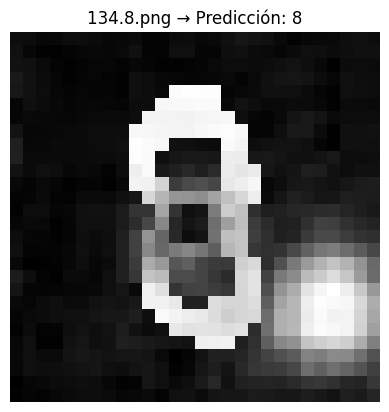

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


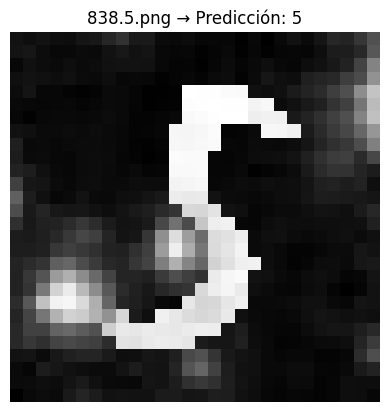

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


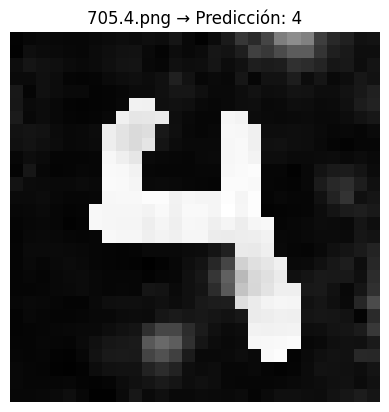

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


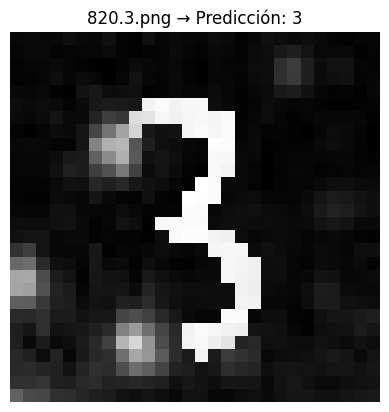

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


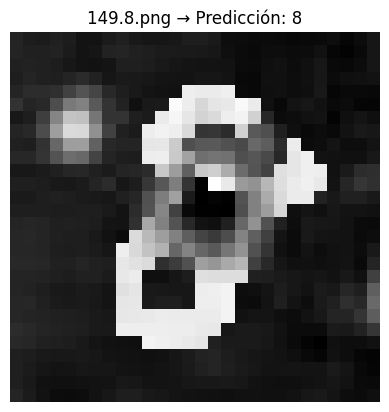

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


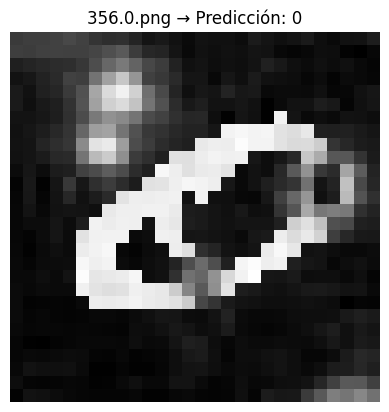

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


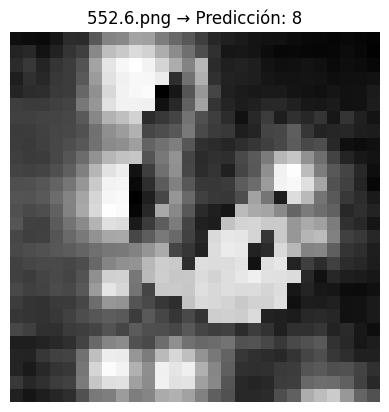

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


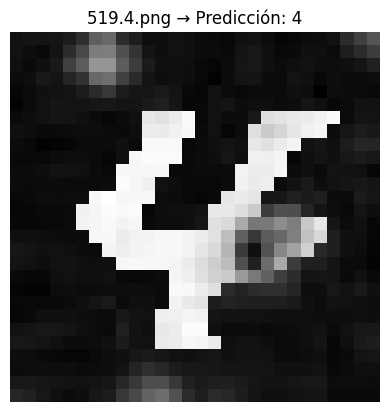

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


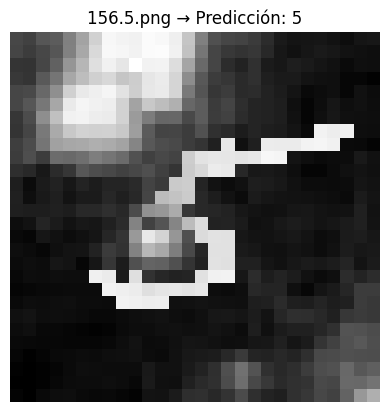

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


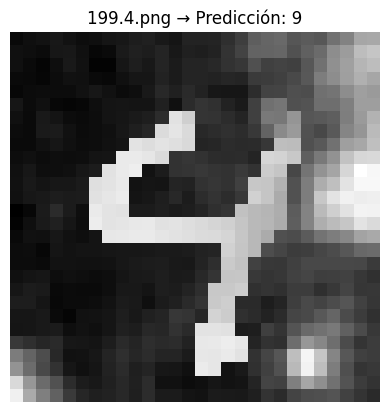

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


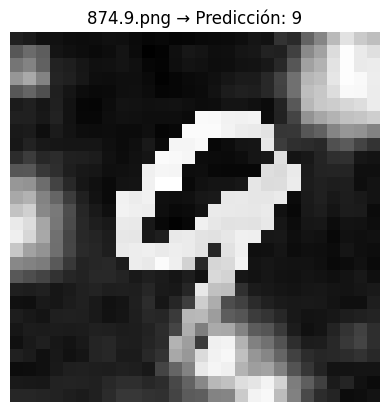

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


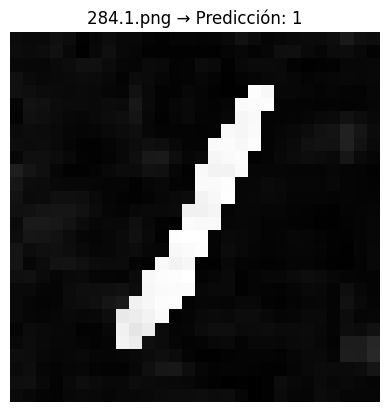

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


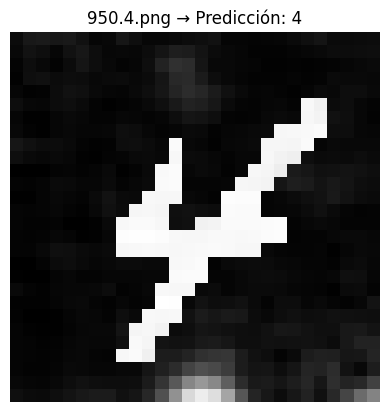

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


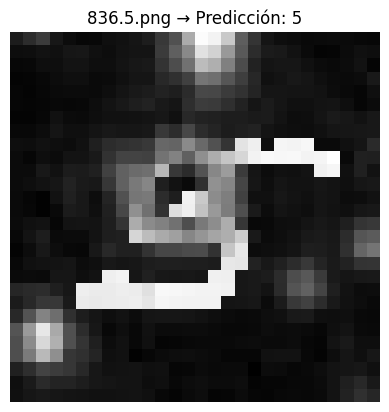

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


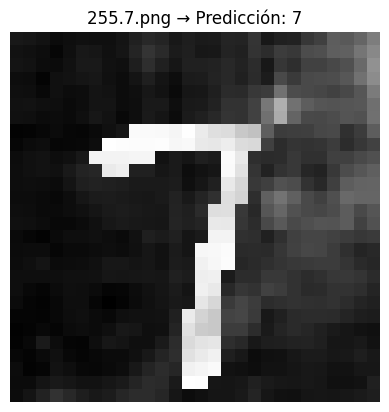

In [44]:
predict_images("cnn_model.h5", folder="PolyMNIST/MMNIST/test/m3", num_images=20)